### This is a simulation for ODEs that represent the 1-dim incompressible Langrangian model for a thermal
#### buoyancy driven flows

In [2]:
from scipy.integrate import  odeint,RK45,solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# excluding thermo, multiphase.. just a thermal plume
def eqns_plume(t,y):
    a,th,u,x = y
  
    l = 3*alpha/a #experimental
    dadt =  a*abs(u)*l/3
    dthdt = (G0-Gd)*u - l*abs(u)*th
    dxdt = u
    B = 1/fr**2 * (th) 
    dudt = B - l*u*abs(u)
    return [dadt,dthdt,dudt,dxdt]

__Comment__: notice that we have taken abs(u) and not just u.

In [46]:
alpha=1
b0=100
tinf0=300
cd=1
eps=1/30

fr=1
delT0 = 10
th0=1
g=10
y0 = np.array([1,th0,0,0])
t1=(0,100)
te = np.linspace(0,100,1000)#(0,20)


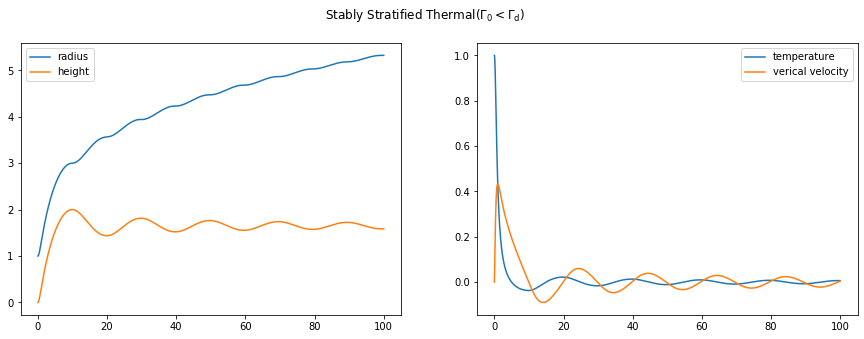

In [49]:
G0=0.1 *b0/(eps*tinf0)
Gd=0.11 *b0/(eps*tinf0)
sol=solve_ivp(eqns_plume, t1, y0, method='RK45',t_eval=te)
t=sol['t']
y=sol['y']
a,th,u,x=y
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,a,label='radius')
plt.plot(t,x, label='height')
plt.legend()
plt.subplot(122)
plt.plot(t,th, label='temperature')
plt.plot(t,u, label = 'verical velocity')
plt.legend()
plt.suptitle('Stably Stratified Thermal($\Gamma_0<\Gamma_d$)')
plt.show()

__Conclusion__: In the stably stratified environment the parcel rises upto some level, increasing its size by entraining continuously. 

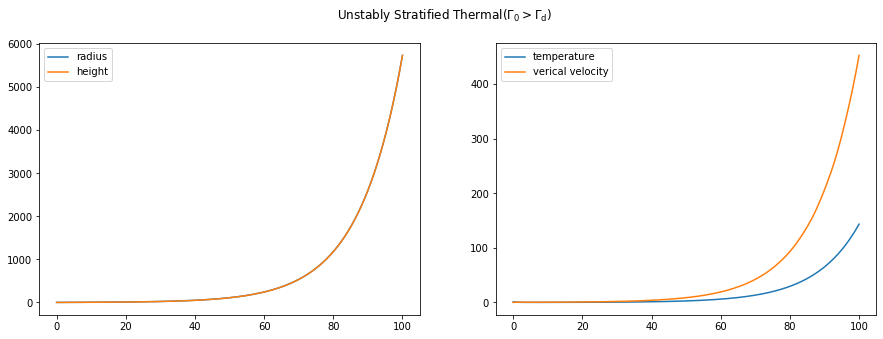

In [50]:
G0=0.1 *b0/(eps*tinf0)
Gd=0.09 *b0/(eps*tinf0)
sol=solve_ivp(eqns_plume, t1, y0, method='RK45',t_eval=te)
t=sol['t']
y=sol['y']
a,th,u,x=y
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,a,label='radius')
plt.plot(t,x, label='height')
plt.legend()
plt.subplot(122)
plt.plot(t,th, label='temperature')
plt.plot(t,u, label = 'verical velocity')
plt.legend()
plt.suptitle('Unstably Stratified Thermal($\Gamma_0>\Gamma_d$)')
plt.show()

__Conclusion__: In the unstably stratified environment the parcel keeps rising, increasing its size by entraining continuously. 

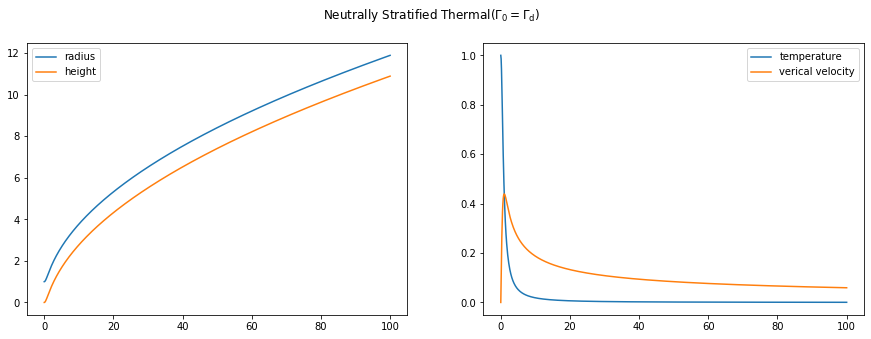

In [56]:
G0=0.1 *b0/(eps*tinf0)
Gd=0.1 *b0/(eps*tinf0)
sol=solve_ivp(eqns_plume, t1, y0, method='RK45',t_eval=te)
t=sol['t']
y=sol['y']
a,th,u,x=y
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,a,label='radius')
plt.plot(t,x, label='height')
plt.legend()
plt.subplot(122)
plt.plot(t,th, label='temperature')
plt.plot(t,u, label = 'verical velocity')
plt.legend()
plt.suptitle('Neutrally Stratified Thermal($\Gamma_0=\Gamma_d$)')
plt.show()

__Conclusion__: In the neutrually stratified environment the parcel keeps rising but with negligible verticle velocity, increasing its size by entraining continuously. This can be thought like a bifurcation point.

# including phase transitions - incomplete

In [52]:
#excluding drag, condensation and evaporation, derivatives in time domain
def eqns(y,t):
    #params: alpha,G0,Gd,L1,sinf,fr,eps,rs0,chi #Gd = 0.01, b0=10,100,1000?, #G0(0.06-0.09)<Gd=0.01, tinf,0 = 300k, 10k =delT, sinf=, alpha 0.1, Lv = 2.5 10^6, cp 1000, Rv = 461.5, g ?
    #background_functions: rsinf(x) by clasius claperon, g = 10, rs0 =0.02-0.05, eps = 1/30, tau_s = 0.1/0.01, chi = 1.6
    
    #rl>0 condition?
    a,th,rv,u,x,rl = y
    l = 3*alpha/a #experimental
    dadt =  a*abs(u)*l/3
    dthdt = (G0-Gd)*u - l*abs(u)*th
    dxdt = u
    rsinf = np.exp(-L1*G0*x)
    drvdt = -l*u*rv - abs(u)*(sinf*rsinf*(-L1*G0)) - b/w*1/taus*np.heaviside(rv/rs-1,0)
    B = 1/fr**2 * (th + r0*((chi-1)*rv))# r0 = rs0/eps is correct
    dudt = B - l*u*abs(u)
    rs = np.exp(-L1*(G0*x-th))
    drldt= b/w*1/taus*np.heaviside(rv/rs-1,0)
    ## include liquid condensation level, 
    return [dadt,dthdt,drvdt,dudt,dxdtdrldt] 





In [ ]:
r0=rs0/eps
alpha=1
b0=100
tinf0=300
cd=1
eps=1/30
G0=0.1 *b0/(eps*tinf0)
Gd=0.101 *b0/(eps*tinf0)
fr=1
delT0 = 10
th0=1
#w=np.sqrt(b0*g*eps)
g=10
y0 = np.array([1,th0,0,0])
t=(0,100)
te = np.linspace(0,100,1000)#(0,20)
#sol=solve_ivp(eqns_plume, t, y0, method='RK45',t_eval=te)
#t=sol['t']
#y=sol['y']